In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

## Load the dataset
California housing dataset

In [3]:
data = fetch_california_housing()
X = data.data
y = data.target

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
data.feature_names


Shape of X: (20640, 8)
Shape of y: (20640,)


['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [4]:

# Split dataset into training and test set

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit a Single LASSO Model

In [6]:
alpha = 0.1  # regularization strength

lasso = Lasso(alpha=alpha, max_iter=5000)
lasso.fit(X_train_scaled, y_train)

print("Lasso Coefficients:")
print(lasso.coef_)

print("\nIntercept:", lasso.intercept_)
print("\nTest R^2:", lasso.score(X_test_scaled, y_test))

Lasso Coefficients:
[ 0.71059779  0.1064527  -0.          0.         -0.         -0.
 -0.01146856 -0.        ]

Intercept: 2.0719469373788817

Test R^2: 0.48136113250290746


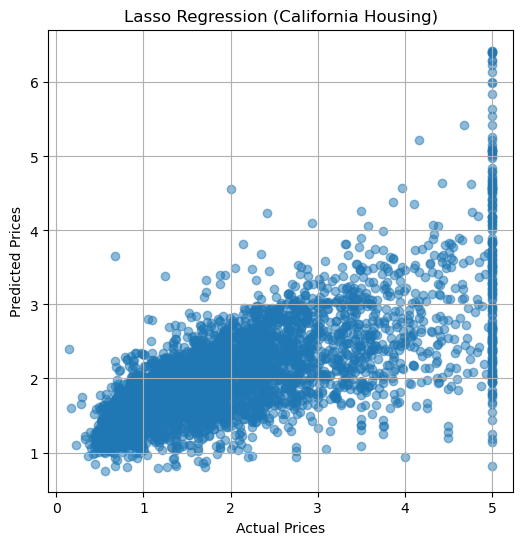

In [7]:
y_pred = lasso.predict(X_test_scaled)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Lasso Regression (California Housing)")
plt.grid(True)
plt.show()


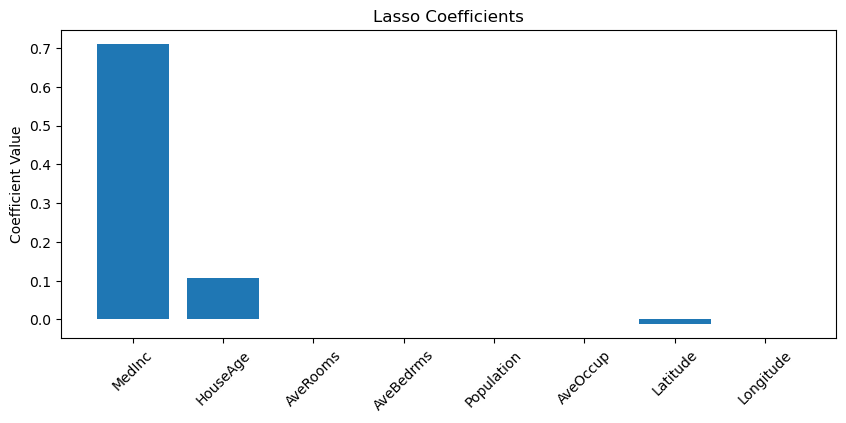

In [8]:
plt.figure(figsize=(10,4))
plt.bar(range(len(lasso.coef_)), lasso.coef_)
plt.xticks(range(len(lasso.coef_)), data.feature_names, rotation=45)
plt.ylabel("Coefficient Value")
plt.title("Lasso Coefficients")
plt.show()


In [9]:
def run_sklearn_lasso(alpha=0.1):
    data = fetch_california_housing()
    X, y = data.data, data.target

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = Lasso(alpha=alpha, max_iter=5000)
    model.fit(X_train_scaled, y_train)

    print("alpha =", alpha)
    print("Coefficients:", model.coef_)
    print("Test R^2:", model.score(X_test_scaled, y_test))

    return model

model = run_sklearn_lasso(alpha=0.1)


alpha = 0.1
Coefficients: [ 0.71059779  0.1064527  -0.          0.         -0.         -0.
 -0.01146856 -0.        ]
Test R^2: 0.48136113250290746


Try different $\alpha$ value

In [10]:
import numpy as np
from sklearn.linear_model import Lasso

alphas = np.logspace(-3, 1, 20)   # from 0.001 to 10, 20 values

coefs = []
r2_test_list = []
nnz_list = []   # number of non–zero coefficients

for a in alphas:
    model = Lasso(alpha=a, max_iter=5000)
    model.fit(X_train_scaled, y_train)
    
    coefs.append(model.coef_)
    r2_test_list.append(model.score(X_test_scaled, y_test))
    nnz_list.append(np.sum(model.coef_ != 0))

# Quick look at the results
for a, r2, nnz in zip(alphas, r2_test_list, nnz_list):
    print(f"alpha = {a:.4f},  Test R^2 = {r2:.3f},  nonzero coef = {nnz}")


alpha = 0.0010,  Test R^2 = 0.577,  nonzero coef = 8
alpha = 0.0016,  Test R^2 = 0.577,  nonzero coef = 8
alpha = 0.0026,  Test R^2 = 0.578,  nonzero coef = 7
alpha = 0.0043,  Test R^2 = 0.580,  nonzero coef = 7
alpha = 0.0070,  Test R^2 = 0.581,  nonzero coef = 7
alpha = 0.0113,  Test R^2 = 0.582,  nonzero coef = 7
alpha = 0.0183,  Test R^2 = 0.578,  nonzero coef = 7
alpha = 0.0298,  Test R^2 = 0.565,  nonzero coef = 6
alpha = 0.0483,  Test R^2 = 0.534,  nonzero coef = 4
alpha = 0.0785,  Test R^2 = 0.490,  nonzero coef = 3
alpha = 0.1274,  Test R^2 = 0.470,  nonzero coef = 2
alpha = 0.2069,  Test R^2 = 0.431,  nonzero coef = 1
alpha = 0.3360,  Test R^2 = 0.382,  nonzero coef = 1
alpha = 0.5456,  Test R^2 = 0.248,  nonzero coef = 1
alpha = 0.8859,  Test R^2 = -0.000,  nonzero coef = 0
alpha = 1.4384,  Test R^2 = -0.000,  nonzero coef = 0
alpha = 2.3357,  Test R^2 = -0.000,  nonzero coef = 0
alpha = 3.7927,  Test R^2 = -0.000,  nonzero coef = 0
alpha = 6.1585,  Test R^2 = -0.000,  nonze

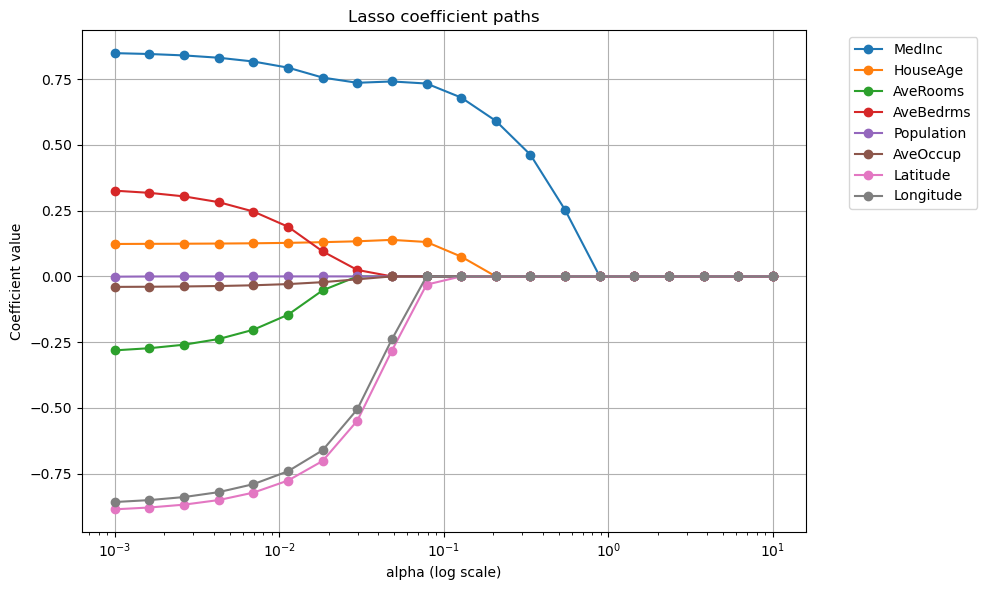

In [11]:
coefs = np.array(coefs)      # shape: (n_alpha, n_features)

plt.figure(figsize=(10, 6))
for j in range(coefs.shape[1]):
    plt.semilogx(alphas, coefs[:, j], marker="o")

plt.xlabel("alpha (log scale)")
plt.ylabel("Coefficient value")
plt.title("Lasso coefficient paths")
plt.grid(True)
plt.legend(data.feature_names, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

Best subsect selection

In [16]:
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

In [17]:
def best_subset_selection(X_train, y_train, X_test, y_test, feature_names):
    n_features = X_train.shape[1]
    results = []         # store (k, subset, r2, coef_vector)
    
    for k in range(1, n_features + 1):
        print(f"Evaluating subsets of size k = {k}...")
        
        best_r2 = -np.inf
        best_subset = None
        best_coef = None
        
        for subset in itertools.combinations(range(n_features), k):
            X_train_sub = X_train[:, subset]
            X_test_sub  = X_test[:, subset]

            model = LinearRegression()
            model.fit(X_train_sub, y_train)
            r2 = model.score(X_test_sub, y_test)

            if r2 > best_r2:
                best_r2 = r2
                best_subset = subset
                # store coefficients in full p-length vector
                full_coef = np.zeros(n_features)
                full_coef[list(subset)] = model.coef_
                best_coef = full_coef
        
        results.append({
            "k": k,
            "subset": best_subset,
            "r2": best_r2,
            "coef": best_coef
        })
    
    return results


In [18]:
best_results = best_subset_selection(
    X_train_scaled, y_train,
    X_test_scaled, y_test,
    feature_names=data.feature_names
)
best_results

Evaluating subsets of size k = 1...
Evaluating subsets of size k = 2...
Evaluating subsets of size k = 3...
Evaluating subsets of size k = 4...
Evaluating subsets of size k = 5...
Evaluating subsets of size k = 6...
Evaluating subsets of size k = 7...
Evaluating subsets of size k = 8...


[{'k': 1,
  'subset': (0,),
  'r2': 0.45885918903846656,
  'coef': array([0.79851956, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ])},
 {'k': 2,
  'subset': (0, 1),
  'r2': 0.4940606792889837,
  'coef': array([0.82533949, 0.2203573 , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ])},
 {'k': 3,
  'subset': (0, 6, 7),
  'r2': 0.5720551152709819,
  'coef': array([ 0.70251884,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        , -1.03214159, -0.99581707])},
 {'k': 4,
  'subset': (0, 1, 6, 7),
  'r2': 0.5810616616067165,
  'coef': array([ 0.72574691,  0.12151924,  0.        ,  0.        ,  0.        ,
          0.        , -0.94310463, -0.90073509])},
 {'k': 5,
  'subset': (0, 1, 5, 6, 7),
  'r2': 0.5819916213547502,
  'coef': array([ 0.7269862 ,  0.12255772,  0.        ,  0.        ,  0.        ,
         -0.03854788, -0.94028074, -0.89802062])},
 {'k': 6,
  'subset': (0, 1, 2, 5, 6, 7),
  

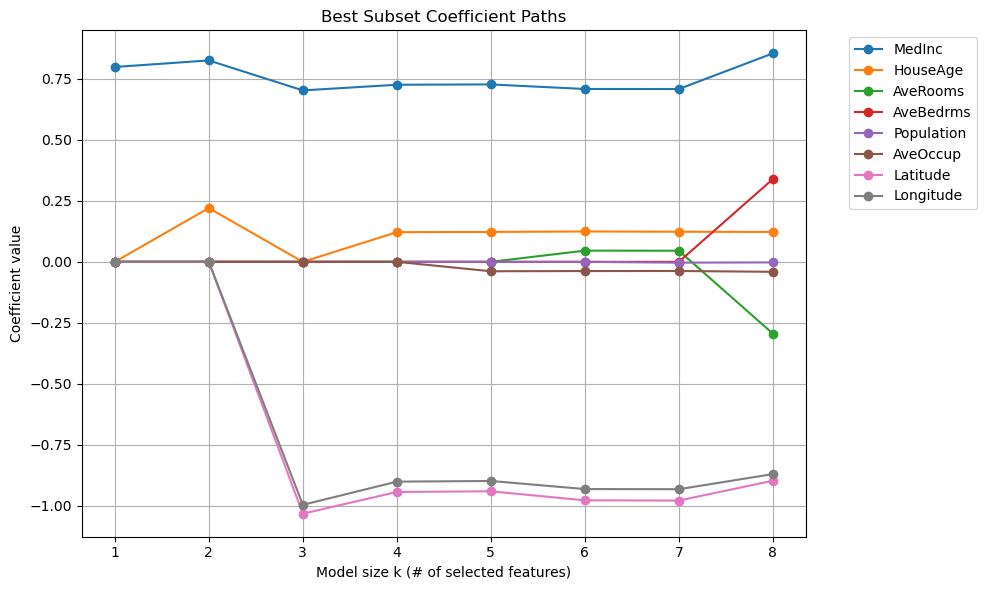

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Extract data
k_values = [r["k"] for r in best_results]
coef_matrix = np.array([r["coef"] for r in best_results])   # shape (n_k, n_features)
feature_names = data.feature_names

plt.figure(figsize=(10, 6))

for j in range(coef_matrix.shape[1]):
    plt.plot(k_values, coef_matrix[:, j], marker="o", label=feature_names[j])

plt.xlabel("Model size k (# of selected features)")
plt.ylabel("Coefficient value")
plt.title("Best Subset Coefficient Paths")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


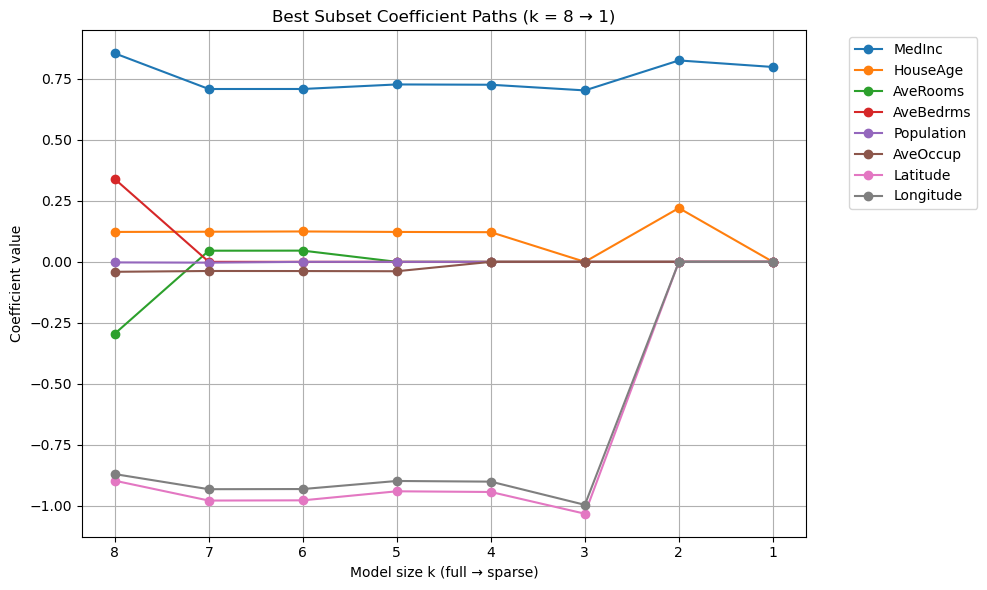

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Extract data
k_values = np.array([r["k"] for r in best_results])
coef_matrix = np.array([r["coef"] for r in best_results])
feature_names = data.feature_names

# Reverse order manually (8→1)
k_rev = k_values[::-1]
coef_rev = coef_matrix[::-1]

plt.figure(figsize=(10, 6))

for j in range(coef_rev.shape[1]):
    plt.plot(k_rev, coef_rev[:, j], marker="o", label=feature_names[j])

plt.xlabel("Model size k (full → sparse)")
plt.ylabel("Coefficient value")
plt.title("Best Subset Coefficient Paths (k = 8 → 1)")

plt.grid(True)

# 🔥 Key line: reverse the x-axis visually
plt.gca().invert_xaxis()

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


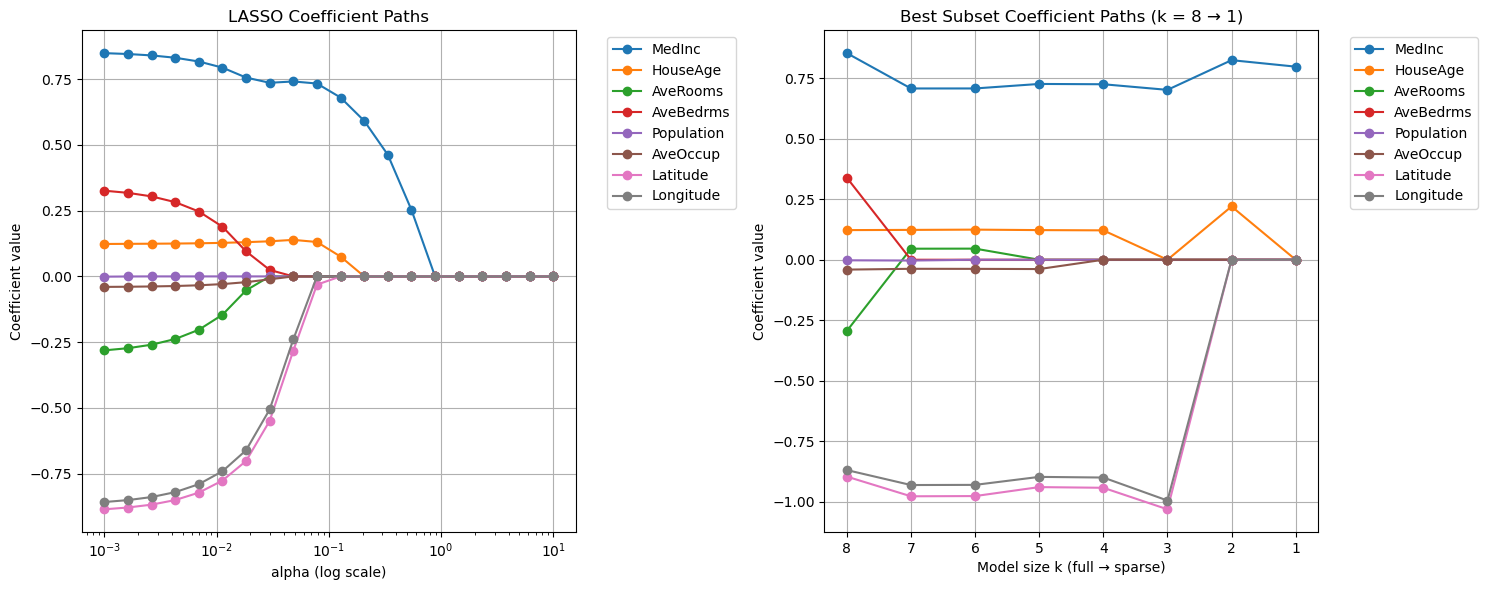

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# ----- Prepare LASSO data -----
lasso_coefs = np.array(coefs)   # shape (n_alpha, p)

# ----- Prepare Best Subset data -----
k_vals = np.array([r["k"] for r in best_results])             # [1,2,...,8]
coef_bs = np.array([r["coef"] for r in best_results])        # shape (8,p)
k_rev = k_vals[::-1]                                         # [8,...,1]
coef_bs_rev = coef_bs[::-1]                                  # reversed rows

feature_names = data.feature_names


# ===========================================================
#                  SIDE-BY-SIDE PLOT
# ===========================================================

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# ------------------ LEFT: LASSO PATHS --------------------
ax = axes[0]

for j in range(lasso_coefs.shape[1]):
    ax.semilogx(alphas, lasso_coefs[:, j], marker="o")

ax.set_xlabel("alpha (log scale)")
ax.set_ylabel("Coefficient value")
ax.set_title("LASSO Coefficient Paths")
ax.grid(True)
ax.legend(feature_names, bbox_to_anchor=(1.05, 1), loc="upper left")


# ------------------ RIGHT: BEST SUBSET PATHS --------------------
ax = axes[1]

for j in range(coef_bs_rev.shape[1]):
    ax.plot(k_rev, coef_bs_rev[:, j], marker="o")

ax.set_xlabel("Model size k (full → sparse)")
ax.set_ylabel("Coefficient value")
ax.set_title("Best Subset Coefficient Paths (k = 8 → 1)")
ax.grid(True)

# Flip x-axis so left=8 (full model), right=1 (sparse)
ax.invert_xaxis()

ax.legend(feature_names, bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()
